# GAMs to estimate probability of first attack failure
This R notebook fits Generalised Additive Models (GAMs) to the incidents data.

In [1]:
library(tidyverse)
library(mgcv)
library(reticulate)

source(file.path('rconfig.R'))
DATA_DIRECTORY = file.path(HOME_DIRECTORY, 'vic-ia', 'data', 'processed')
FOREST_GAM_RESULTS = file.path(DATA_DIRECTORY, 'incidents_forest_test_gam_results.csv')
GRASS_GAM_RESULTS = file.path(DATA_DIRECTORY, 'incidents_grass_test_gam_results.csv')

── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: nlme


Attaching package: 'nlme'


The following object is masked from 'package:dplyr':

    collapse


This is mgcv 1.9-1. For overview type 'help("mgcv-package")'.

Warning message:
"package 'reticulate' was built under R versio

In [2]:
use_python(python = PYTHON_EXE_FOR_RETICULATE, required=TRUE)
source_python(file.path(HOME_DIRECTORY, 'vic-ia', 'code', 'get_model_data.py'))

In [3]:
grass_incidents_train_df = grass_incidents %>% filter(is_train_data==1)
grass_incidents_test_df = grass_incidents %>% filter(is_train_data==0)
forest_incidents_train_df = forest_incidents %>% filter(is_train_data==1)
forest_incidents_test_df = forest_incidents %>% filter(is_train_data==0)

## Grass, 2 hrs

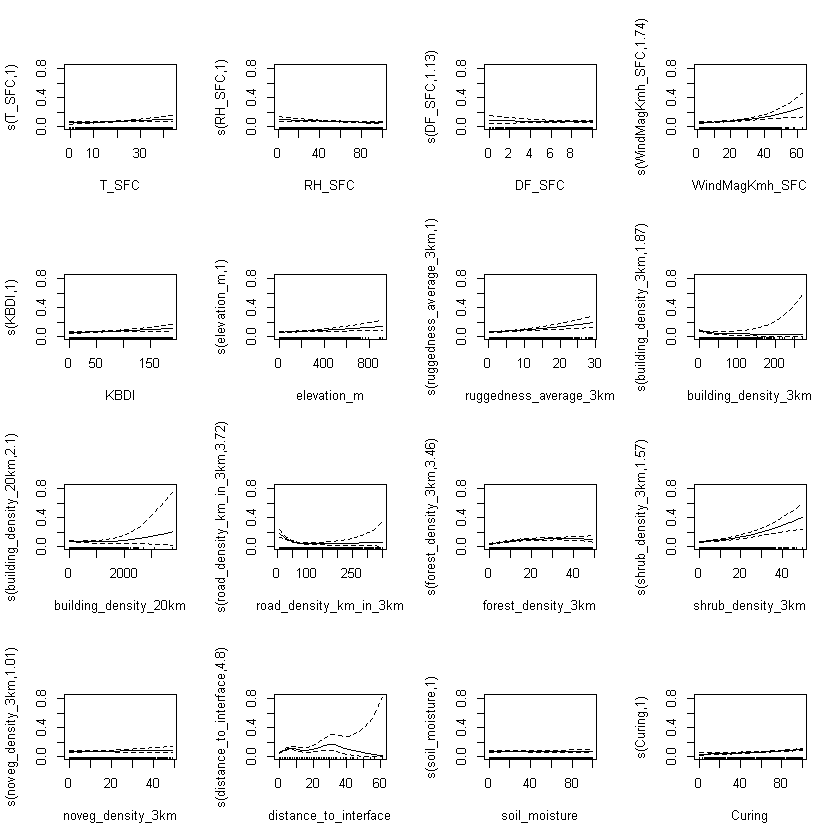

In [4]:
mod01 = gam(uncontrolled_within_2_hrs ~ s(T_SFC) + T_SFC_ishistorical + s(RH_SFC) + s(DF_SFC) + s(WindMagKmh_SFC) + s(KBDI) + s(elevation_m) + s(ruggedness_average_3km) + s(building_density_3km) + 
            s(building_density_20km) + s(road_density_km_in_3km) + s(forest_density_3km) + s(shrub_density_3km) + s(noveg_density_3km) + s(distance_to_interface) + s(soil_moisture) + s(Curing),
            data = grass_incidents_train_df,
            family = binomial,
            method = "REML")
plot(mod01, pages=1, trans=plogis, shift = coef(mod01)[1], seWithMean=TRUE)


Method: REML   Optimizer: outer newton
full convergence after 10 iterations.
Gradient range [-0.0001383564,0.0001500444]
(score 2122.705 & scale 1).
Hessian positive definite, eigenvalue range [3.247377e-05,1.289537].
Model rank =  146 / 146 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

                            k'  edf k-index p-value    
s(T_SFC)                  9.00 1.00    0.94   0.085 .  
s(RH_SFC)                 9.00 1.00    0.98   0.920    
s(DF_SFC)                 9.00 1.13    0.94   0.055 .  
s(WindMagKmh_SFC)         9.00 1.74    0.96   0.345    
s(KBDI)                   9.00 1.00    0.92  <2e-16 ***
s(elevation_m)            9.00 1.00    0.96   0.505    
s(ruggedness_average_3km) 9.00 1.00    0.94   0.085 .  
s(building_density_3km)   9.00 1.87    0.97   0.790    
s(building_density_20km)  9.00 2.10    0.93   0.010 ** 
s(road_density_km_in_3km) 9.00 3.72    0.96   0.535    
s(forest_d

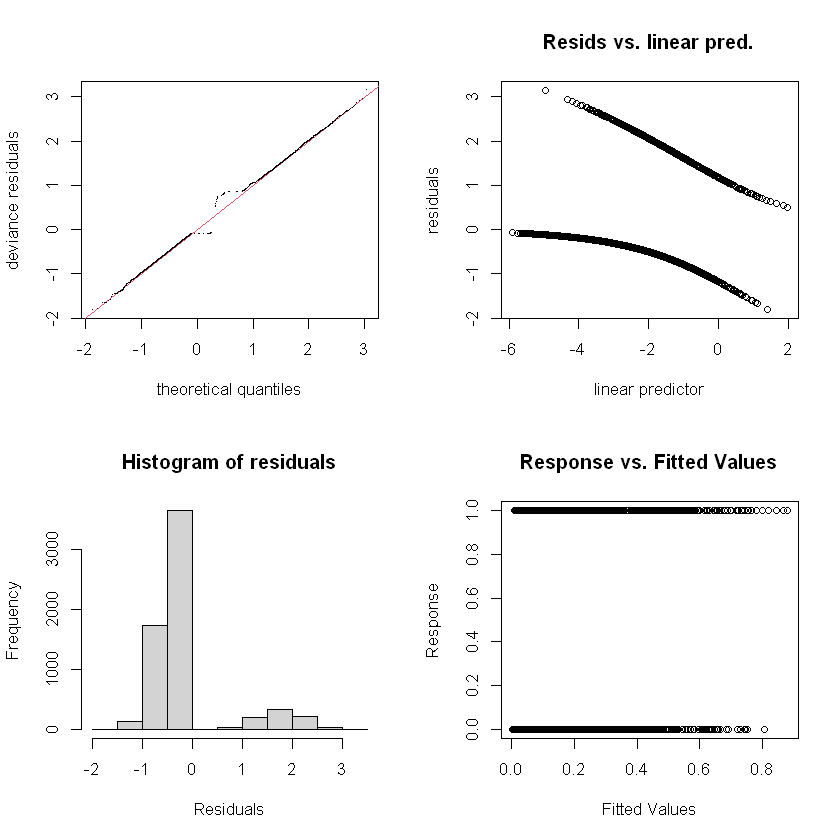

In [7]:
gam.check(mod01)

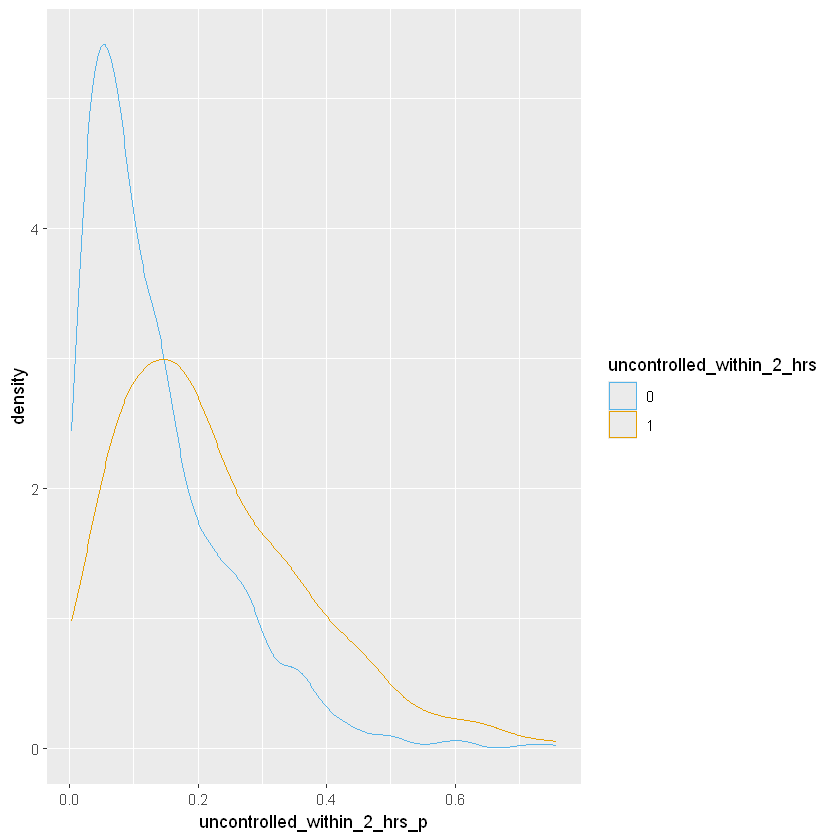

In [8]:
grass_incidents_test_df = grass_incidents_test_df %>%
    mutate(uncontrolled_within_2_hrs_p = as.numeric(predict(mod01, grass_incidents_test_df, type="response")),
           uncontrolled_within_2_hrs = as.factor(uncontrolled_within_2_hrs)
    )

ggplot(grass_incidents_test_df, aes(x=uncontrolled_within_2_hrs_p, colour=uncontrolled_within_2_hrs)) +
  geom_density() + 
  scale_color_manual(values=c("#56B4E9", "#E69F00"))

## Grass, 100 ha

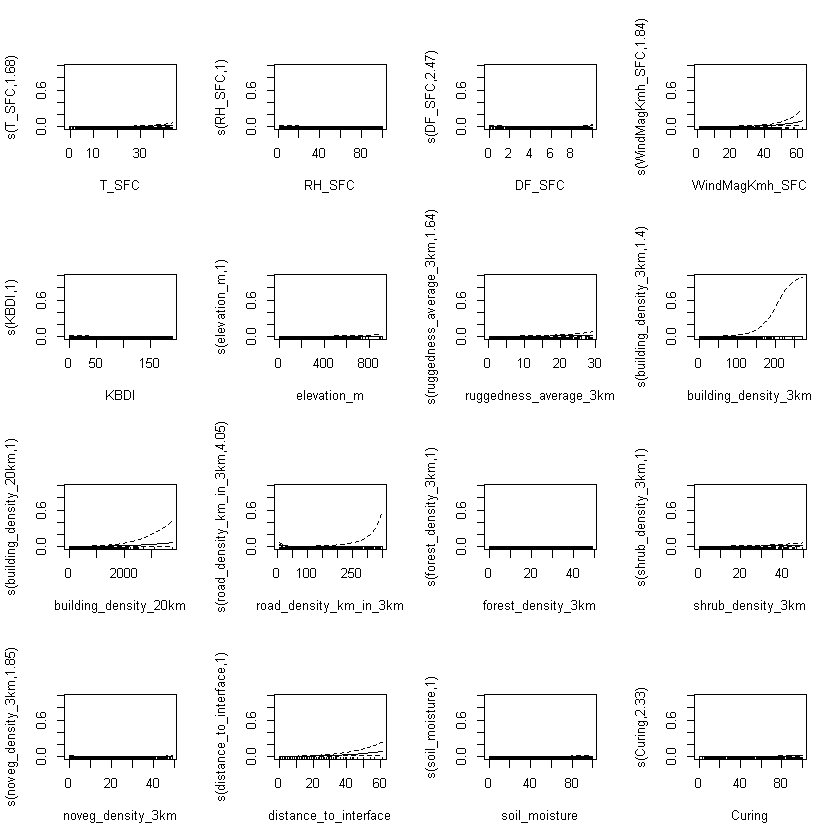

In [9]:
mod02 = gam(uncontrolled_within_100_ha ~ s(T_SFC) + T_SFC_ishistorical + s(RH_SFC) + s(DF_SFC) + s(WindMagKmh_SFC) + s(KBDI) + s(elevation_m) + s(ruggedness_average_3km) + s(building_density_3km) + 
            s(building_density_20km) + s(road_density_km_in_3km) + s(forest_density_3km) + s(shrub_density_3km) + s(noveg_density_3km) + s(distance_to_interface) + s(soil_moisture) + s(Curing),
            data = grass_incidents_train_df,
            family = binomial,
            method = "REML")

plot(mod02, pages=1, trans=plogis, shift = coef(mod02)[1], seWithMean=TRUE)


Method: REML   Optimizer: outer newton
full convergence after 10 iterations.
Gradient range [-6.785533e-05,1.478046e-05]
(score 637.0102 & scale 1).
Hessian positive definite, eigenvalue range [1.426928e-06,1.254532].
Model rank =  146 / 146 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

                            k'  edf k-index p-value  
s(T_SFC)                  9.00 1.68    0.92   0.085 .
s(RH_SFC)                 9.00 1.00    0.92   0.135  
s(DF_SFC)                 9.00 2.47    0.93   0.200  
s(WindMagKmh_SFC)         9.00 1.84    0.92   0.060 .
s(KBDI)                   9.00 1.00    0.92   0.035 *
s(elevation_m)            9.00 1.00    0.94   0.535  
s(ruggedness_average_3km) 9.00 1.64    0.94   0.505  
s(building_density_3km)   9.00 1.40    0.95   0.695  
s(building_density_20km)  9.00 1.00    0.94   0.500  
s(road_density_km_in_3km) 9.00 4.05    0.94   0.390  
s(forest_density_3km)     9.00 1

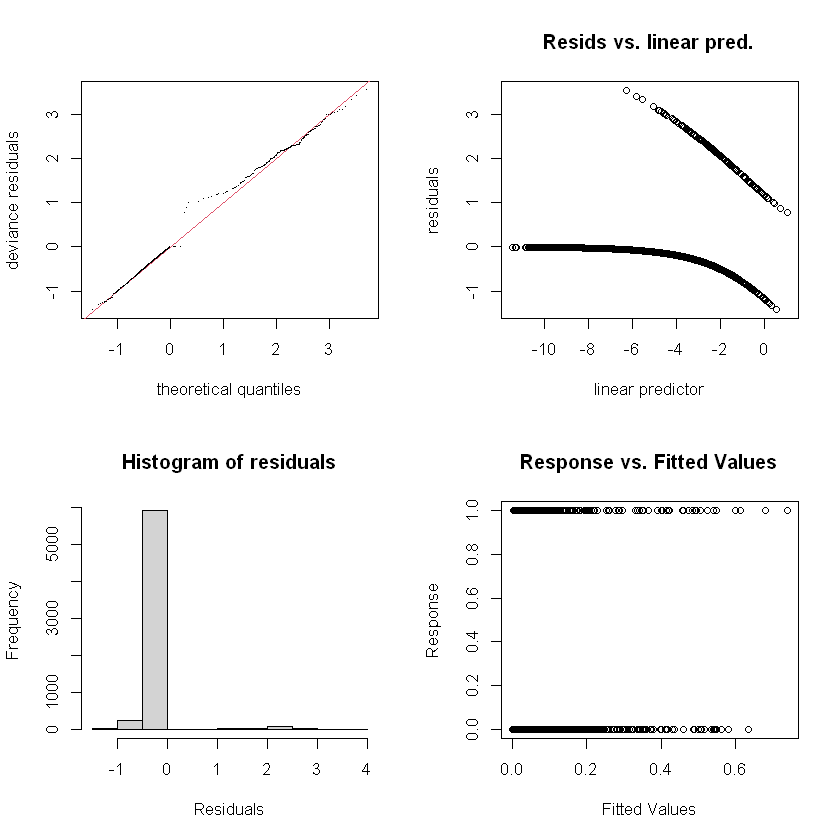

In [10]:
gam.check(mod02)

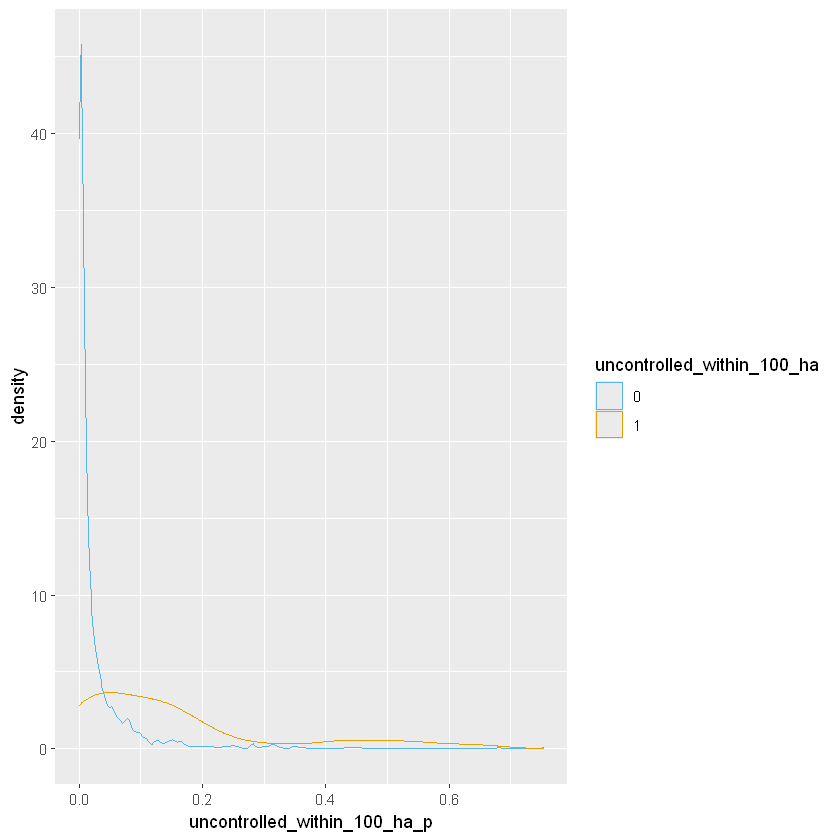

In [11]:
grass_incidents_test_df = grass_incidents_test_df %>%
    mutate(uncontrolled_within_100_ha_p = as.numeric(predict(mod02, grass_incidents_test_df, 
                      type="response")),
           uncontrolled_within_100_ha = as.factor(uncontrolled_within_100_ha)
    )

ggplot(grass_incidents_test_df, aes(x=uncontrolled_within_100_ha_p, colour=uncontrolled_within_100_ha)) +
  geom_density() + 
  scale_color_manual(values=c("#56B4E9", "#E69F00"))

## Forest, 4 hrs

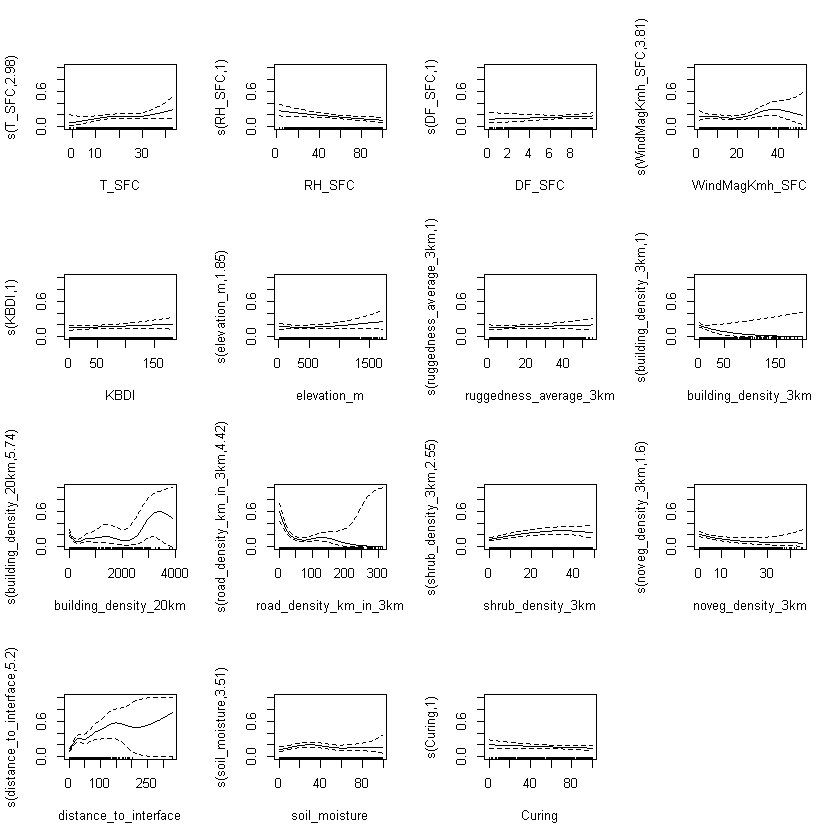

In [13]:
mod03 = gam(uncontrolled_within_4_hrs ~ s(T_SFC) + T_SFC_ishistorical + s(RH_SFC) + s(DF_SFC) + s(WindMagKmh_SFC) + s(KBDI) + s(elevation_m) + s(ruggedness_average_3km) + s(building_density_3km) + 
            s(building_density_20km) + s(road_density_km_in_3km) + s(shrub_density_3km) + s(shrub_density_3km) + s(noveg_density_3km) + s(distance_to_interface) + s(soil_moisture) + s(Curing),
            data = forest_incidents_train_df,
            family = binomial,
            method = "REML")

plot(mod03, pages=1, trans=plogis, shift = coef(mod03)[1], seWithMean=TRUE)


Method: REML   Optimizer: outer newton
full convergence after 9 iterations.
Gradient range [-8.240914e-05,4.962014e-06]
(score 1168.899 & scale 1).
Hessian positive definite, eigenvalue range [2.009922e-06,1.382656].
Model rank =  137 / 137 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

                            k'  edf k-index p-value    
s(T_SFC)                  9.00 2.98    0.99   0.475    
s(RH_SFC)                 9.00 1.00    0.99   0.425    
s(DF_SFC)                 9.00 1.00    0.96   0.065 .  
s(WindMagKmh_SFC)         9.00 3.81    0.93  <2e-16 ***
s(KBDI)                   9.00 1.00    0.94   0.015 *  
s(elevation_m)            9.00 1.85    0.95   0.030 *  
s(ruggedness_average_3km) 9.00 1.00    0.98   0.255    
s(building_density_3km)   9.00 1.00    0.93  <2e-16 ***
s(building_density_20km)  9.00 5.74    0.94   0.005 ** 
s(road_density_km_in_3km) 9.00 4.42    0.98   0.340    
s(shrub_den

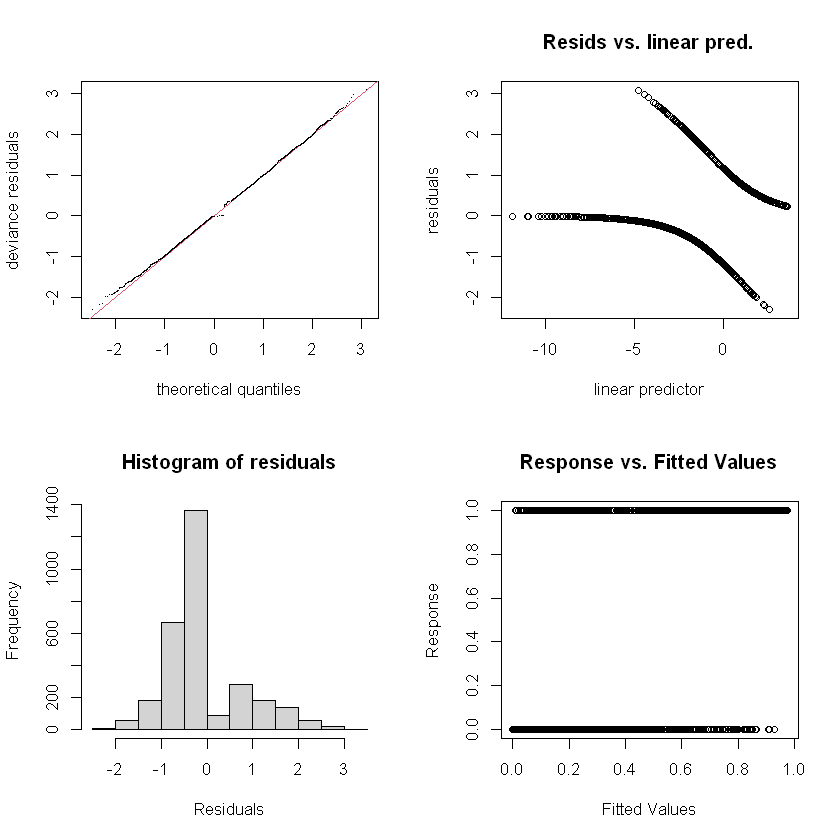

In [14]:
gam.check(mod03)

## Forest, 5 ha

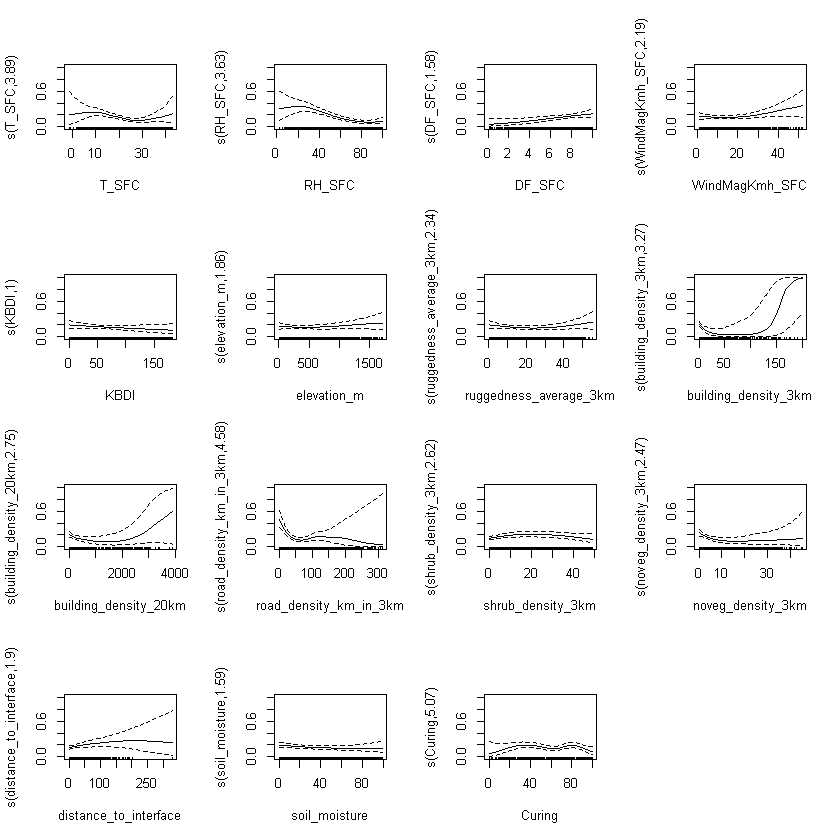

In [15]:
mod04 = gam(uncontrolled_within_5_ha ~ s(T_SFC) + T_SFC_ishistorical + s(RH_SFC) + s(DF_SFC) + s(WindMagKmh_SFC) + s(KBDI) + s(elevation_m) + s(ruggedness_average_3km) + s(building_density_3km) + 
            s(building_density_20km) + s(road_density_km_in_3km) + s(shrub_density_3km) + s(shrub_density_3km) + s(noveg_density_3km) + s(distance_to_interface) + s(soil_moisture) + s(Curing),
            data = forest_incidents_train_df,
            family = binomial,
            method = "REML")

plot(mod04, pages=1, trans=plogis, shift = coef(mod03)[1], seWithMean=TRUE)


Method: REML   Optimizer: outer newton
full convergence after 7 iterations.
Gradient range [-0.0005658544,0.000146727]
(score 1066.423 & scale 1).
Hessian positive definite, eigenvalue range [0.0005652582,1.332785].
Model rank =  137 / 137 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

                            k'  edf k-index p-value    
s(T_SFC)                  9.00 3.89    0.93   0.015 *  
s(RH_SFC)                 9.00 3.63    0.95   0.195    
s(DF_SFC)                 9.00 1.58    0.94   0.060 .  
s(WindMagKmh_SFC)         9.00 2.19    0.94   0.040 *  
s(KBDI)                   9.00 1.00    0.97   0.475    
s(elevation_m)            9.00 1.86    0.98   0.685    
s(ruggedness_average_3km) 9.00 2.34    0.98   0.775    
s(building_density_3km)   9.00 3.27    0.86  <2e-16 ***
s(building_density_20km)  9.00 2.75    0.92   0.005 ** 
s(road_density_km_in_3km) 9.00 4.58    0.97   0.710    
s(shrub_dens

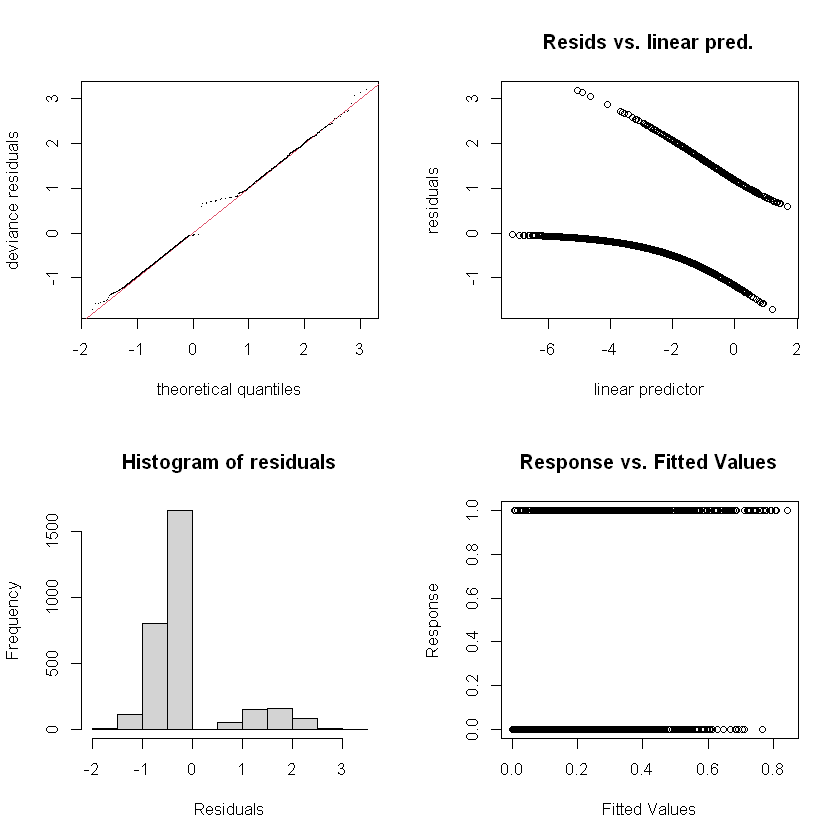

In [16]:
gam.check(mod04)

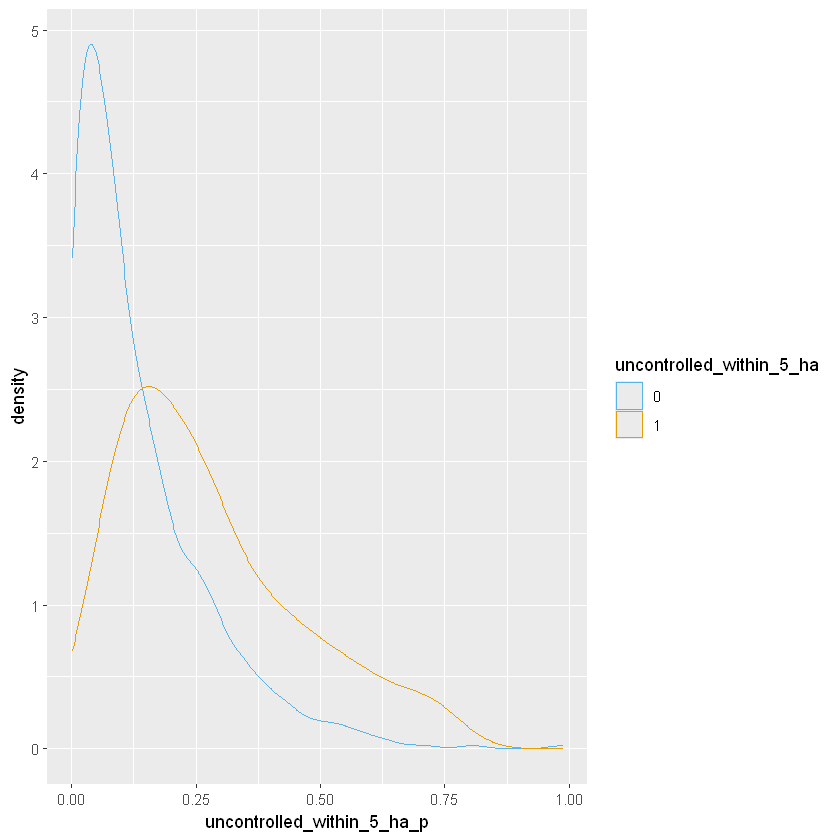

In [17]:
forest_incidents_test_df = forest_incidents_test_df %>%
    mutate(uncontrolled_within_5_ha_p = as.numeric(predict(mod04, forest_incidents_test_df, 
                      type="response")),
           uncontrolled_within_5_ha = as.factor(uncontrolled_within_5_ha)
    )

ggplot(forest_incidents_test_df, aes(x=uncontrolled_within_5_ha_p, colour=uncontrolled_within_5_ha)) +
  geom_density() + 
  scale_color_manual(values=c("#56B4E9", "#E69F00"))

## Write results to csv so they can be read in by Python to make diagnostic plots

In [20]:
grass_incidents = grass_incidents %>%
  mutate(uncontrolled_within_2_hrs_p = as.numeric(predict(mod01, grass_incidents, 
                      type="response")),
         uncontrolled_within_100_ha_p = as.numeric(predict(mod02, grass_incidents, 
                      type="response"))
  )

forest_incidents = forest_incidents %>%
  mutate(uncontrolled_within_4_hrs_p = as.numeric(predict(mod03, forest_incidents, 
                      type="response")),
         uncontrolled_within_5_ha_p = as.numeric(predict(mod04, forest_incidents, 
                      type="response"))
  )

write_csv(grass_incidents, GRASS_GAM_RESULTS)
write_csv(forest_incidents, FOREST_GAM_RESULTS)